# Networking for Big Data - Assigment #1
# Faranak Alikhah - Mehrdad Hassanzadeh - Behdad Ahmadi- Braulio Villalobos

#### Import Libraries

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.linalg import eig

## 1st Part 

#### Generation of ER Graphs

In [2]:
def er_graph_f(num_nodes, prob,show_graph = True):
    '''
    Creating the ER Graph by using the networkx library.
    num_nodes corresponds to the total number of nodes the ER graph contains.
    prob corresponds to the probability that each edge is included in the graph independently 
    from every other edge.
    '''
    G= nx.erdos_renyi_graph(num_nodes,prob)
    
    if show_graph:
        nx.draw(G, with_labels=True)
        plt.show()
    return G

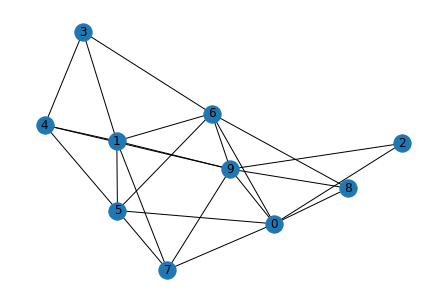

In [4]:
innn = er_graph_f(10,0.5)

#### Generation of r-regular random graph

In [3]:
def rr_graph_f(d,n,seed_par = None,show_graph=False):
    '''
    Creation of the Random Regular Graphs
    d corresponds to the degree of each node
    n corresponds to the number of nodes (n x d must ve even)
    seed corresponds to the indicator of the random number generation
    '''
    
    G = nx.random_regular_graph(d, n, seed=seed_par)
    if show_graph:
        nx.draw(G, with_labels=True)
        plt.show()
    return G

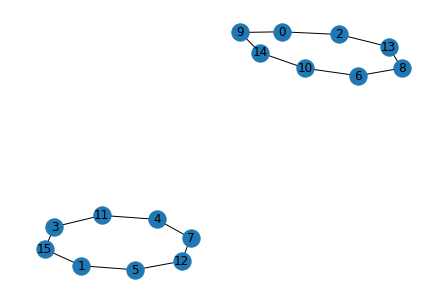

In [66]:
z = rr_graph_f(2, 16)

## Methods to Check Connectivity

### A) Breadth-First-Search Algorithm 

In [4]:
def Check_connectivity_BFS(Graph):
    Nodes = list(nx.nodes(Graph))
    visited = set()
    BFS_queue = [Nodes[0]]
    while BFS_queue: 
        Target_node = BFS_queue.pop(0)
        if Target_node not in visited: 
            visited.add(Target_node)
            BFS_queue += list(nx.neighbors(Graph, Target_node))
    return True if len(visited) == len(list(nx.nodes(Graph))) else False 

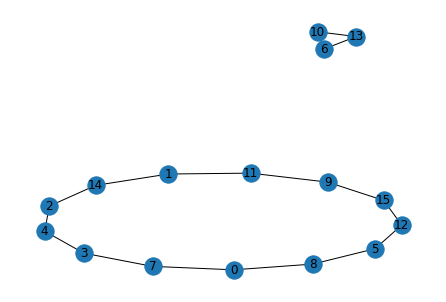

The graph is not connected!!!


In [75]:
Result = Check_connectivity_BFS(rr_graph_f(2, 16, seed_par = 4))
print("The graph is connected!!!" if Result else "The graph is not connected!!!")

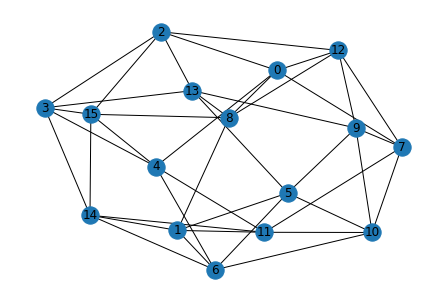

The graph is connected!!!


In [76]:
Result = Check_connectivity_BFS(rr_graph_f(5, 16, seed_par = 4))
print("The graph is connected!!!" if Result else "The graph is not connected!!!")

### B) Irreducibility

__Note: We are not sure about this__<br><br>
But as far as we know, this function approach will only work when we have a strongly connected network. Otherwise we can not find out if the graph is connected or not.<br><br>
__Irreducibility implies that the graph is connected, while reducibility doesn't imply not connectivity.__

In [18]:
def Check_irreducibility(Graph): 
    Num_of_nodes = nx.number_of_nodes(Graph) # To get the number of the nodes in the given graph 
    Result = np.identity(Num_of_nodes) # To build the identity matrix in the same size of the graph 
    Adjacency_matrix = nx.to_numpy_array(Graph) # To have the adjacency matrix of the given graph 
    
    Result += Adjacency_matrix # Temporary result of I + A
    Temp = Adjacency_matrix.copy()
    for i in range(Num_of_nodes - 2): # Range to A^n-1
        Adjacency_matrix *= Temp
        Result += Adjacency_matrix
    return False if (Result <= 0 ).any() else True

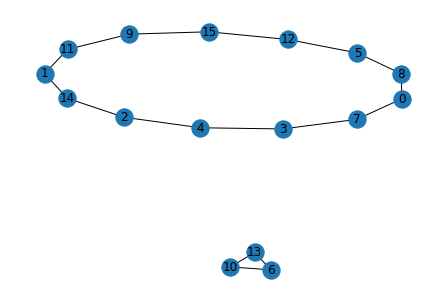

Our graph is: Reducible


In [14]:
Graph_reducible = rr_graph_f(2, 16, seed_par = 4, show_graph = True)
Graph_reducible
print("Our graph is:", "Reducible" if Check_irreducibility(Graph_reducible) == False else "Irreducible")

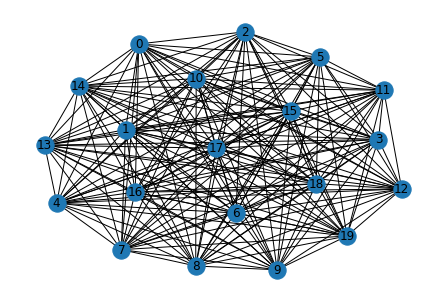

Our graph is: Irreducible


In [24]:
Graph_reducible = rr_graph_f(19, 20, show_graph = True)
print("Our graph is:", "Reducible" if Check_irreducibility(Graph_reducible) == False else "Irreducible")

### C) Eigenvalue of the Laplacian Matrix

We define the Laplacian of a graph as a $n x n$ matrix, which is defined as follows:

* $L_{ii}$ = $d_i$, where $d_i$ is the degree of node $i$
* $L_{ij}$ = -1, if and only if $(i,j) \in A$

We can also get the Laplacian Matrix through the following: 

$L = D - A$

Where
* $D$ is the degree matrix
* $A$ is the adjacency matrix

In [5]:
def adj_matrix_f(G):
    '''
    Uses networkx library to retrieve the Adjacency Matrix of a given graph G.
    '''
    node_list = sorted([x for x in G.nodes()])
    #return(nx.to_numpy_matrix(G,nodelist= node_list))
    return(nx.adjacency_matrix(G, nodelist=node_list))

In [6]:
def degree_matrix(adj_matrix):
    '''
    Given the adjacency matrix of a graph, it retrieves the degree matrix which has in its diagonal
    the total number of edges for each node in the given adjacency matrix. 
    '''
    dim = np.zeros([adj_matrix.shape[0], adj_matrix.shape[0]]) 
    rows, cols = adj_matrix.nonzero()
    for row, col in zip(rows, cols):
        dim[row, row] += 1
    return dim

In [7]:
def laplac_matrix(G):
    '''
    Compute the Laplacian Matrix
    '''
    A = adj_matrix_f(G)
    D = degree_matrix(A)
    L = D-A
    return(L.astype(int))

In [8]:
def eing_values(l_matrix):
    w,v=eig(l_matrix)
    return w
    #return(w.astype(int))

In [98]:
def check_connectivity_laplacian(G):
    '''
    Check connectivity through eigenvalues of the Laplacian Matrix
    '''
    lapl_matrix = laplac_matrix(G)
    eig_val = eing_values(lapl_matrix)
    return(1 if (sorted(list(eig_val))[1]) >0 else 0)

In [107]:
'''
Random experiment to estimate and compare the mean complexity of the three methods (BFS, Laplacian & Irreducibility)
used to test the connectivity of a given graph. 
'''

#Define n, which is the number of simulations run for each value of k
n = 100
#Different number of K (nodes) to test the complexity
k_list = list(range(20,501,20))

#Vector to store complexity of Laplacian Matrix for different values of k
vec_laplacian_k = np.zeros(len(k_list))
vec_bfs_k = np.zeros(len(k_list))

for k in k_list:
    vec_laplacian_sim = np.zeros(n)
    vec_bfs_sim = np.zeros(n)
    
    for i in range(0,n):
        
        #Creation of random graph
        r_graph = rr_graph_f(3, k)
    
        #-------Laplacian Test-------------
        # Start of Laplacian Test
        start_time = datetime.datetime.now()

        check_connectivity_laplacian(r_graph)

        end_time = datetime.datetime.now()
        # End of Laplacian Test
        
        #Store results of Laplacian Test
        time_diff = (end_time - start_time)
        execution_time = time_diff.total_seconds() * 1000
        vec_laplacian_sim[i] = execution_time
        #-------Laplacian Test--------------
        
        #-------BFS Test--------------------
        start_time = datetime.datetime.now()
        
        Check_connectivity_BFS(r_graph)
        
        end_time = datetime.datetime.now()
        
        #Store results of BFS Test
        time_diff = (end_time - start_time)
        execution_time = time_diff.total_seconds() * 1000
        vec_bfs_sim[i] = execution_time
        #-------BFS Test--------------------
    
    vec_laplacian_k[int((k/20)-1)] = np.mean(vec_laplacian_sim)
    vec_bfs_k[int((k/20)-1)] = np.mean(vec_bfs_sim)

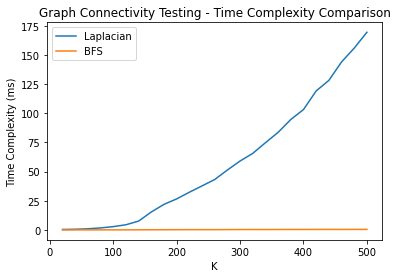

In [111]:
vec_laplacian_k
plt.plot(k_list, vec_laplacian_k,label = "Laplacian")
plt.plot(k_list, vec_bfs_k,label = "BFS")
plt.title('Graph Connectivity Testing - Time Complexity Comparison')
plt.ylabel('Time Complexity (ms)')
plt.xlabel('K')
plt.legend()
plt.show()

## ER Graphs - Monte Carlo Simulations

In [155]:
def er_monte_carlo_sim(K=100, M=150):
    '''
    Function that runs a Monte Carlo Simulation for ER Graphs
        * K parameter corresponds to the number of nodes. It is set by default to 100, as required by the homework. 
        * M parameter corresponds to the number of simulations to be run for each value of p. It is set by default to 150.
    '''
    
    # Create the counter to store how many random graphs, of the total run simulations, are connected, in order to estimate the probability.
    counter = 0 

    # Create the vector of different p's that will be tested. 
    # Define a step to breakdown the probability space
    step = 0.01
    # Create a vector for the different values of p for which we will run simulations. Is the 0-1 interval broken down by the value of "step"
    p_vector = np.arange(0.0, 1.001, step)

    #Create the vector to store the estimated probability, for each value of p, obtained after the M simulations are run. 
    estim_prob = np.zeros(len(p_vector))

    #Value to iterate the estim_prob vector
    t=0
    #For each value of p, contained in p_vector, run simulations...
    for p in p_vector:
        #For a particular value of p, run M simulations...
        for i in range(0,M):
            #Create the ER Graph
            sim_er_graph = er_graph_f(K, p,show_graph = False)
            
            #If graph is connected, increase counter
            if Check_connectivity_BFS(sim_er_graph):
                counter += 1
        
        #Estimate and store the probability, based on the M simulations, for a particular value of p, by following the frequentist prob approach.  
        estim_prob[t] = counter/M
        #Reset counter
        counter = 0
        #Increase iterator of estim_prob vector
        t += 1
    
    return estim_prob, p_vector

In [156]:
res_simulation, p_vector = er_monte_carlo_sim(K=100, M=150)

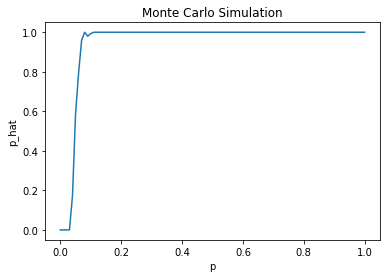

In [157]:
plt.plot(p_vector,res_simulation)
plt.title('ER Graph - Monte Carlo Simulation')
plt.ylabel('p_hat')
plt.xlabel('p')
plt.show()

## R-Regular Random Graphs - Monte Carlo Simulations

In [178]:
def rr_monte_carlo_sim(d=2, n=100, M = 500):
    '''
    Function that runs a Monte Carlo Simulation for R-Regular Graphs
        * d parameter corresponds to the degree of each node
        * n parameter corresponds to the maximum number of nodes for which the simulations will be run
        * M parameter corresponds to the number of simulations that are run for each value of K. 
    (n*d) must be even. However this only becomes important for uneven values of d.
    '''
    # Create the counter to store how many random graphs, of the total run simulations, are connected, in order to estimate the probability.
    counter = 0 

    # Create the K-vector, which corresponds to a vector with values 
    k_vector = list(range(d+1,n+1))

    #Create the vector to store the estimated probability, for each value of p, obtained after the M simulations are run. 
    estim_prob_rr = np.zeros(len(k_vector))

    t = 0
    for k in k_vector: 
    
        for i in range(0,M):
            sim_r_regular_graph = rr_graph_f(d, k)
        
            #If graph is connected, increase counter
            if Check_connectivity_BFS(sim_r_regular_graph):
                counter += 1
    
        estim_prob_rr[t] = counter/M
        counter = 0
        t += 1
    
    return estim_prob_rr, k_vector

In [179]:
r_reg_simulation, k_vector = rr_monte_carlo_sim(d = 2, n = 100, M = 1000)

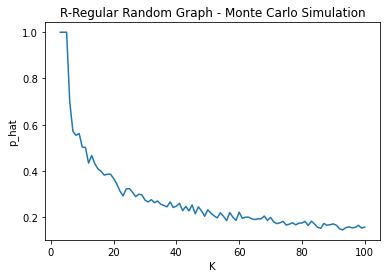

In [180]:
plt.plot(k_vector,r_reg_simulation)
plt.title('R-Regular Random Graph - Monte Carlo Simulation')
plt.ylabel('p_hat')
plt.xlabel('K')
plt.show()

In [183]:
r_reg_simulation, k_vector = rr_monte_carlo_sim(d = 8, n = 100, M = 1000)

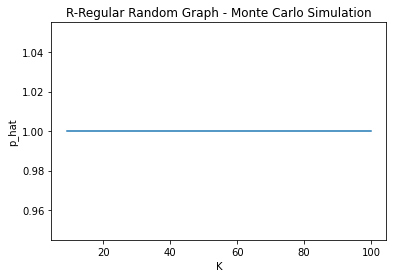

In [184]:
plt.plot(k_vector,r_reg_simulation)
plt.title('R-Regular Random Graph - Monte Carlo Simulation')
plt.ylabel('p_hat')
plt.xlabel('K')
plt.show()

### Backup

In [ ]:
'''
Adjacency Matrix can also be retrieved with the following
'''

#ttt = nx.adjacency_matrix(z)
#print(ttt.todense())

In [ ]:
node_list = sorted([x for x in z.nodes()])
xxx = nx.laplacian_matrix(z, nodelist=node_list)

print(xxx.todense())